# 1. SVM模型
SVM模型优化参数与特征工程 <br />
优化参数使用网格搜索法 <br />
特征工程主要使用kmer <br />
(1)首先测试未使用特征工程时模型的性能 <br />
(2)接着测试 2-kmer模型的性能 <br />
(3)然后测试 3-kmer模型的性能

# (1)未使用特征工程时模型的性能
这里不适用测试数据，只使用训练数据集与开发数据集

In [89]:
import numpy as np
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import time
from sklearn.model_selection import GridSearchCV


In [96]:
def follow(lines,func,func_args=dict(),concate=False):
    if concate == True:
        for index,line in enumerate(lines):       
            if index == 0:
                temp = func(line,**func_args)
            else:
                if isinstance(temp,list):
                    temp.extend(func(line,**func_args))
    else:
        temp = [func(line,**func_args) for line in lines ]
    return temp
        
            
def readfile(filename,flag):
    if flag=='P':
        filename ='../data/'+filename+'.txt'
    else:
        filename = '../data/neg'+filename+'.txt'
    
    with open(filename) as f:
        return [line.strip() for line in f.readlines()]

def KmerCode(x,k):
    category = dict()
    base='ATCG'
    def str_multiply(a,b):
        return([i+j for i in a for j in b])

    for i in range(k-1):
        base = str_multiply(a='ATCG',b=base)

    for i in base:
        category[i] = 0

    for i in range(len(x)-k+1):
        category[x[i:i+k]]+=1
    
    
    return list(category.values())

def n_gram(x,k):
    pass

#评价模型
def assess(y_true,y_prob,roc=True,pr=False,poly_name=None,line_name=None):
    '''
    pass
    '''
    re={}
    y_pred =(y_prob+0.5).astype(int)
    
    re['accuracy'] = round(metrics.accuracy_score  (y_true,y_pred),3)
    re['precision'] = round(metrics.precision_score(y_true,y_pred),3)
    re['recall'] = round(metrics.recall_score      (y_true,y_pred),3)
    re['f1'] =  round(metrics.f1_score             (y_true,y_pred),3)
    re['auc'] = round(metrics.roc_auc_score        (y_true, y_prob),3)
    
    
    fpr,tpr,thresholds = metrics.roc_curve(y_true,y_prob)
    plt.plot(fpr,tpr,label= 'SVM :'+str(re['auc']))
    plt.title('ROC curve')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    
    #precision, recall, thresholds = metrics.precision_recall_curve(y_true,y_prob)
    #plt.plot(precision,recall,label='precison_and_recall')
    plt.legend()
    
    return re



# 2-kmer

In [109]:
#load data
X = follow(polys,readfile,func_args={'flag':'P'},concate=True)+\
    follow(polys,readfile,func_args={'flag':'N'},concate=True)
y = [1]*(len(X)//2)+[0]*(len(X)//2)

#remove polyA signal
X = [x[:100]+x[106:] for x in X]

#kmer encode
X = follow(X, KmerCode, func_args = {'k':2})

#归一化,使得所有数据在0~1之间
X = np.array(X)/16

#划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

#训练数据
start = time.time()
clf = SVC(C=100,gamma=1,kernel='rbf',probability=True)
clf.fit(X_train,y_train)
pred_prob = clf.predict_proba(X_test)[:,1]
print('time:',time.time()-start)

assess(y_test,pred_prob)
svm_result_2kmer=(y_test,pred_prob)

# 3-kmer

time: 94.46925902366638


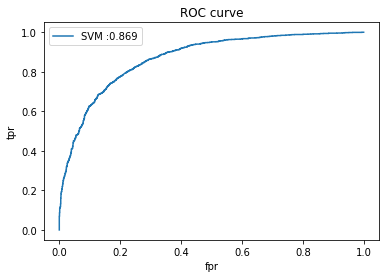

In [100]:
#load data
X = follow(polys,readfile,func_args={'flag':'P'},concate=True)+\
    follow(polys,readfile,func_args={'flag':'N'},concate=True)
y = [1]*(len(X)//2)+[0]*(len(X)//2)

#remove polyA signal
X = [x[:100]+x[106:] for x in X]

#kmer encode
X = follow(X, KmerCode, func_args = {'k':3})

#归一化,使得所有数据在0~1之间
X = np.array(X)/16

#划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

#训练数据
start = time.time()
clf = SVC(C=100,gamma=1,kernel='rbf',probability=True)
clf.fit(X_train,y_train)
pred_prob = clf.predict_proba(X_test)[:,1]
print('time:',time.time()-start)

assess(y_test,pred_prob)
svm_result_3kmer=(y_test,pred_prob)

# 4kmer

In [93]:
#load data
X = follow(polys,readfile,func_args={'flag':'P'},concate=True)+\
    follow(polys,readfile,func_args={'flag':'N'},concate=True)
y = [1]*(len(X)//2)+[0]*(len(X)//2)

#remove polyA signal
X = [x[:100]+x[106:] for x in X]

#kmer encode
X = follow(X, KmerCode, func_args = {'k':4})

#归一化,使得所有数据在0~1之间
X = np.array(X)/16

#划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

#训练数据
start = time.time()
clf = SVC(C=100,gamma=1,kernel='rbf',probability=True)
clf.fit(X_train,y_train)
pred_prob = clf.predict_proba(X_test)[:,1]
print('time:',time.time()-start)

assess(y_test,pred_prob)
svm_result_4kmer=(y_test,pred_prob)

time: 349.2726616859436


# 5kmer

time: 772.1044592857361


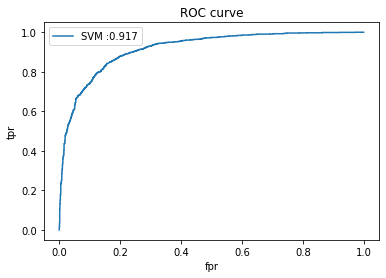

In [102]:
#load data
X = follow(polys,readfile,func_args={'flag':'P'},concate=True)+\
    follow(polys,readfile,func_args={'flag':'N'},concate=True)
y = [1]*(len(X)//2)+[0]*(len(X)//2)

#remove polyA signal
X = [x[:100]+x[106:] for x in X]

#kmer encode
X = follow(X, KmerCode, func_args = {'k':5})

#归一化,使得所有数据在0~1之间
X = np.array(X)/16

#划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

#训练数据
start = time.time()
clf = SVC(C=100,gamma=1,kernel='rbf',probability=True)
clf.fit(X_train,y_train)
pred_prob = clf.predict_proba(X_test)[:,1]
print('time:',time.time()-start)

assess(y_test,pred_prob)
svm_result_5kmer=(y_test,pred_prob)

# 搜索参数空间

In [ ]:
start = time.time()
#设定参数搜索空间
param_grid=[{'kernel':['linear','rbf'],
            'C':[1,10,100,300],
             'gamma':[0.1,1,10,100,300]} ]

model = GridSearchCV(SVC(),param_grid,cv=2,n_jobs = -1)
model.fit(X_train,y_train)
print(time.time()-start)
print(model.best_params_,model.best_score_,model.best_estimator_)

# 比较不同k-mer

{'accuracy': 0.841,
 'precision': 0.839,
 'recall': 0.847,
 'f1': 0.843,
 'auc': 0.917}

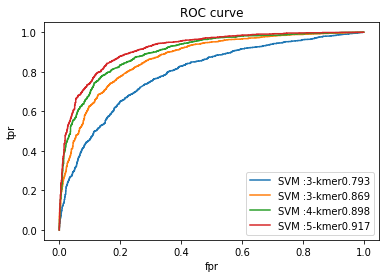

In [110]:
def assess(y_true,y_prob,roc=True,pr=False,poly_name=None,line_name=None,kmer=' '):
    '''
    pass
    '''
    re={}
    y_pred =(y_prob+0.5).astype(int)
    
    re['accuracy'] = round(metrics.accuracy_score  (y_true,y_pred),3)
    re['precision'] = round(metrics.precision_score(y_true,y_pred),3)
    re['recall'] = round(metrics.recall_score      (y_true,y_pred),3)
    re['f1'] =  round(metrics.f1_score             (y_true,y_pred),3)
    re['auc'] = round(metrics.roc_auc_score        (y_true, y_prob),3)
    
    
    fpr,tpr,thresholds = metrics.roc_curve(y_true,y_prob)
    plt.plot(fpr,tpr,label= 'SVM :'+kmer+str(re['auc']))
    plt.title('ROC curve')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    
    #precision, recall, thresholds = metrics.precision_recall_curve(y_true,y_prob)
    #plt.plot(precision,recall,label='precison_and_recall')
    plt.legend()
    
    return re
assess(svm_result_2kmer[0],svm_result_2kmer[1],kmer='3-kmer')
assess(svm_result_3kmer[0],svm_result_3kmer[1],kmer='3-kmer')
assess(svm_result_4kmer[0],svm_result_4kmer[1],kmer='4-kmer')
assess(svm_result_5kmer[0],svm_result_5kmer[1],kmer='5-kmer')